<a href="https://colab.research.google.com/github/a-dhingra/python-for-data-analysis/blob/master/ML_SciKit_vs_Tf.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import timeit, time, sys, os


In [8]:
# Creating a random array of feature vector
X = np.random.randint(low=3, high=20, size=5,)
X

array([13, 12,  5, 19, 12])

In [9]:
# Reshape the X vector to a matrix
X = np.expand_dims(X, axis=-1)
X

array([[13],
       [12],
       [ 5],
       [19],
       [12]])

In [11]:
# Creating the label for the dataset
y = X + 10
y

array([[23],
       [22],
       [15],
       [29],
       [22]])

In [12]:
# Explore the nature of these arrays X and y
print(f"Array X: {X}\nShape: {X.shape}\nDtype: {X.dtype}")
print(f"\nArray y: {y}\nShape: {y.shape}\nDtype: {y.dtype}")

Array X: [[13]
 [12]
 [ 5]
 [19]
 [12]]
Shape: (5, 1)
Dtype: int64

Array y: [[23]
 [22]
 [15]
 [29]
 [22]]
Shape: (5, 1)
Dtype: int64


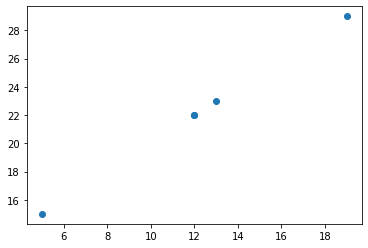

In [13]:
# Visualizing the dataset
plt.scatter(X,y)

In [14]:
# Training : Training is nothing but finding the values of coefficients and intercept.
# Intercepts are also called BIASes. 
# Coefficients are also called WEIGHTs.

**Importing and using the model**

In [15]:
# import the model from sklearn
from sklearn.linear_model import LinearRegression

In [16]:
# instantiate the model
model = LinearRegression()

In [17]:
# Fit the model
model.fit(X,y)

LinearRegression()

In [18]:
# Viewing the optimal value of intercept and co-eff calcualted by the model
print(f"Co-eff: {model.coef_}\nIntercept: {model.intercept_}")

Co-eff: [[1.]]
Intercept: [10.]


**Predicting a value and calculating the MAE and MSE**

In [19]:
# Checking the outcome for a single 1X1 input matrix
model.predict([[10]])

array([[20.]])

In [20]:
# Importing the MSE and MAE from sklearn
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [21]:
# Predicting the results y_pred on the original input matrix X
y_pred = model.predict(X)

In [22]:
# Calculating the MAE and MSE
mae = mean_absolute_error(y, y_pred)
mse = mean_absolute_error(y, y_pred)
print(f"MAE: {mae}\nMSE: {mse}")

MAE: 7.105427357601002e-16
MSE: 7.105427357601002e-16


**Using TensorFlow for DeepLearning approach**

In [23]:
# import the libraries
import tensorflow as tf
from tensorflow import keras

In [43]:
# Set the random seed
tf.random.set_seed(42)

In [44]:
# 1. Create the model
model = tf.keras.Sequential([
                             tf.keras.layers.Input(shape=(1,1)), #define the input shape
                             tf.keras.layers.Dense(1, name='outputLayer')  # Defining the output shape
                             ], name='linearRegressor')

In [45]:
# 2. Compile the model
model.compile(loss=tf.keras.losses.MeanSquaredError(),
              optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.3),
              metrics=['mae'])

In [46]:
# 3. Visualize the model
model.summary()

Model: "linearRegressor"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 outputLayer (Dense)         (None, 1, 1)              2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [47]:
# COnvert the data to tensors
X = tf.constant(X)
y = tf.constant(y)

In [48]:
# 4. Fit the model
History = model.fit(X,y, epochs=1000, validation_split=0.33, batch_size=10, verbose=0, shuffle=True)

In [51]:
# 5. Viewing the value of bias and weights calculated by the model
print(f"Weights: {model.layers[0].weights}\nBias: {model.layers[0].bias.numpy()}")

Weights: [<tf.Variable 'outputLayer/kernel:0' shape=(1, 1) dtype=float32, numpy=array([[1.035969]], dtype=float32)>, <tf.Variable 'outputLayer/bias:0' shape=(1,) dtype=float32, numpy=array([9.595151], dtype=float32)>]
Bias: [9.595151]


**Predicting a value and calculating the MAE and MSE:**

In [52]:
# Checking the outcome for a single 1X1 input tensor(matrix)
model.predict(tf.constant([[10]]))

array([[[19.954842]]], dtype=float32)

In [53]:
# Predicting the results y_pred on the original input matrix X
y_preds = model.predict(X)

In [57]:
# Chaing the y and Y_preds to vectors
y = y.squeeze()
y_preds = y_preds.squeeze()

In [58]:
# Calculating the MSE and MAE
mae = tf.metrics.mean_absolute_error(y, y_preds)
mse = tf.metrics.mean_squared_error(y, y_preds)
print(f"MAE: {mae}\nMSE: {mse}")

MAE: 0.12397422641515732
MSE: 0.02671889401972294
